In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import GEOparse
import mygene
from scipy.stats import zscore

### Prepare clinical csv

In [21]:
gse = GEOparse.get_GEO("GSE62564") #GSE62564 has EFS data
gse2 = GEOparse.get_GEO("GSE49711") #GSE49711 has microarray data

24-Feb-2021 15:35:13 DEBUG utils - Directory ./ already exists. Skipping.
24-Feb-2021 15:35:13 INFO GEOparse - File already exist: using local version.
24-Feb-2021 15:35:13 INFO GEOparse - Parsing ./GSE62564_family.soft.gz: 
24-Feb-2021 15:35:13 DEBUG GEOparse - DATABASE: GeoMiame
24-Feb-2021 15:35:13 DEBUG GEOparse - SERIES: GSE62564
24-Feb-2021 15:35:13 DEBUG GEOparse - PLATFORM: GPL11154
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528894
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528895
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528896
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528897
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528898
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528899
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528900
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528901
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528902
24-Feb-2021 15:35:13 DEBUG GEOparse - SAMPLE: GSM1528903
24-Feb-2021 15:35:13 DEBUG GEOparse 

24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529031
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529032
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529033
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529034
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529035
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529036
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529037
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529038
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529039
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529040
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529041
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529042
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529043
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529044
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529045
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529046
24-Feb-2021 15:35:15 DEBUG GEOparse - SAMPLE: GSM1529047
24-Feb-2021 15:35:15 DEBUG GEOp

24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529175
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529176
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529177
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529178
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529179
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529180
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529181
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529182
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529183
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529184
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529185
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529186
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529187
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529188
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529189
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529190
24-Feb-2021 15:35:16 DEBUG GEOparse - SAMPLE: GSM1529191
24-Feb-2021 15:35:16 DEBUG GEOp

24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529321
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529322
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529323
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529324
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529325
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529326
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529327
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529328
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529329
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529330
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529331
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529332
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529333
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529334
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529335
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529336
24-Feb-2021 15:35:17 DEBUG GEOparse - SAMPLE: GSM1529337
24-Feb-2021 15:35:17 DEBUG GEOp

24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205800
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205801
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205802
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205803
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205804
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205805
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205806
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205807
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205808
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205809
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205810
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205811
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205812
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205813
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205814
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205815
24-Feb-2021 15:35:18 DEBUG GEOparse - SAMPLE: GSM1205816
24-Feb-2021 15:35:18 DEBUG GEOp

24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205944
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205945
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205946
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205947
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205948
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205949
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205950
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205951
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205952
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205953
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205954
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205955
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205956
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205957
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205958
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205959
24-Feb-2021 15:35:19 DEBUG GEOparse - SAMPLE: GSM1205960
24-Feb-2021 15:35:19 DEBUG GEOp

24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206088
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206089
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206090
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206091
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206092
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206093
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206094
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206095
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206096
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206097
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206098
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206099
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206100
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206101
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206102
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206103
24-Feb-2021 15:35:20 DEBUG GEOparse - SAMPLE: GSM1206104
24-Feb-2021 15:35:20 DEBUG GEOp

24-Feb-2021 15:35:21 DEBUG GEOparse - SAMPLE: GSM1206232
24-Feb-2021 15:35:21 DEBUG GEOparse - SAMPLE: GSM1206233


In [22]:
#Load clinical data into dataframes
clinical = gse.phenotype_data
clinical2 = gse2.phenotype_data

In [23]:
#Formatting and merging dataframes
clinical = clinical.reset_index()
clinical2 = clinical2.reset_index()
clinical = pd.concat([clinical, clinical2], axis=1)

In [30]:
#Get just the columns I'm interested in and rename them
reduced_clinical = clinical[['index', 'title', 'characteristics_ch1.1.Sex', 'characteristics_ch1.2.age',
                             'characteristics_ch1.3.efs day', 'characteristics_ch1.4.efs bin',
                             'characteristics_ch1.5.os day', 'characteristics_ch1.6.os bin',
                             'characteristics_ch1.4.mycn status','characteristics_ch1.5.high risk',
                            'characteristics_ch1.6.inss stage','characteristics_ch1.8.progression',
                            'characteristics_ch1.9.death from disease']]



In [33]:
#Rename columns and drop the duplicates
reduced_clinical.columns = ['GSM', 'GSM2', 'SampID2', 'SampID', 'Sex', 'Age', 'EFS Time', 'EFS Bin', 'OS Time', 'OS Bin', 'MYCN Amplification', 'High Risk', 'INSS Stage', 'Progression', 'Death from Disease']
reduced_clinical = reduced_clinical.drop(['GSM2', 'SampID2'], axis=1)

In [35]:
#Reset index to SampID
reduced_clinical = reduced_clinical.set_index('SampID')

In [36]:
reduced_clinical

,GSM,Sex,Age,EFS Time,EFS Bin,OS Time,OS Bin,MYCN Amplification,High Risk,INSS Stage,Progression,Death from Disease
SampID,,,,,,,,,,,,
SEQC_NB001,GSM1528894,M,987,593,1,1362,1,0,1,4,1,1
SEQC_NB002,GSM1528895,M,1808,2016,1,2836,1,0,1,4,1,1
SEQC_NB003,GSM1528896,F,625,840,1,1191,1,1,1,4,1,1
SEQC_NB004,GSM1528897,F,335,2046,0,2046,0,1,1,2,0,0
SEQC_NB005,GSM1528898,F,536,212,1,220,1,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
SEQC_NB494,GSM1529389,M,56,4828,0,4828,0,0,0,1,0,0
SEQC_NB495,GSM1529390,M,163,2467,0,2467,0,0,0,1,0,0
SEQC_NB496,GSM1529391,M,132,105,1,5780,0,0,0,1,1,0


In [171]:
#Convert dataframe to csv
reduced_clinical.to_csv('../GSE62564/GSE62564_clinical_data.csv')

### Prepare RNA-Seq z-score csv

In [133]:
#Read in RNA-Seq log2rpm data
rpm_df = pd.read_csv('../GSE62564/GSE62564_SEQC_NB_RNA-Seq_log2RPM.txt',sep='\t')
rpm_df = rpm_df.set_index('RefSeqID')

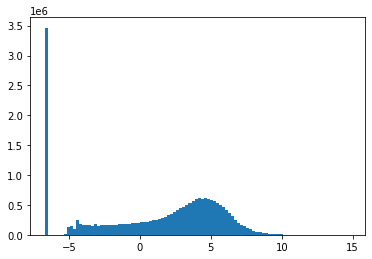

In [135]:
#Plot a histogram of all log2rpm values
plt.hist(rpm_df.values.flatten(),bins=100)
plt.show()

/Users/brandonbergs/anaconda2/envs/v3_8/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/brandonbergs/anaconda2/envs/v3_8/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


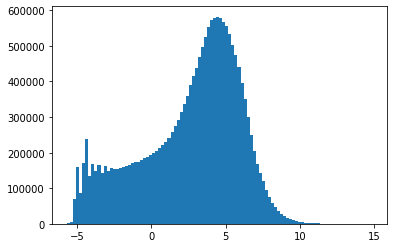

In [137]:
#There appears to be a non-normal spike for log2rpm values < -6
#This might be due to processing error
#Convert all log2rpm values < -6 to np.nan
rpm_df[rpm_df < -6] = np.nan
plt.hist(rpm_df.values.flatten(),bins=100)
plt.show()

In [140]:
rpm_df

,SEQC_NB001,SEQC_NB002,SEQC_NB003,SEQC_NB004,SEQC_NB005,SEQC_NB006,SEQC_NB007,SEQC_NB008,SEQC_NB009,SEQC_NB010,...,SEQC_NB489,SEQC_NB490,SEQC_NB491,SEQC_NB492,SEQC_NB493,SEQC_NB494,SEQC_NB495,SEQC_NB496,SEQC_NB497,SEQC_NB498
RefSeqID,,,,,,,,,,,,,,,,,,,,,
NM_000014,7.211,7.179,7.478,8.124,7.694,7.356,9.059,7.287,7.243,6.440,...,7.331,8.901,7.127,8.052,7.308,8.985,8.760,7.968,8.687,9.603
NM_000015,-4.396,NaN,-4.385,-2.991,-2.371,-4.233,-3.650,NaN,-2.700,-5.012,...,NaN,NaN,NaN,-4.029,-5.430,-4.264,-4.316,-4.924,-4.998,-4.343
NM_000016,5.144,4.812,3.962,5.434,4.109,4.772,5.152,5.121,4.123,5.094,...,3.395,4.230,5.008,3.862,5.443,4.976,5.242,4.989,4.915,5.014
NM_000017,3.537,2.551,2.365,3.403,2.208,3.867,3.059,1.859,2.830,2.472,...,1.841,3.230,3.031,2.328,3.424,3.236,2.923,3.061,2.577,3.441
NM_000018,6.783,7.138,6.283,6.244,6.363,7.264,6.751,5.860,6.793,5.727,...,6.032,6.464,6.565,6.307,7.273,7.428,7.297,7.540,7.629,6.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XR_133572,-0.489,-0.913,-0.926,-0.468,-1.509,-0.203,-0.065,-1.293,-0.870,-0.802,...,-0.535,-1.560,0.075,-0.444,-0.260,-0.126,-0.130,0.030,0.132,-0.141
XR_133573,0.902,0.136,0.659,0.198,-0.103,0.869,0.729,0.219,-0.198,0.255,...,0.613,-0.467,0.757,0.536,0.428,0.690,0.157,0.991,1.244,0.564
XR_133574,-0.050,-0.043,-0.137,0.075,-0.307,0.248,0.504,-0.556,-0.226,-0.057,...,-0.221,-1.380,0.435,-0.292,0.170,0.142,0.317,0.536,0.784,-0.006


In [148]:
#Convert log2rpm dataframe into zscore dataframe
zscores = pd.DataFrame(index=rpm_df.index,columns=rpm_df.columns)
for row in rpm_df.index:
    zscores.loc[row] = zscore(rpm_df.loc[row].values,nan_policy='omit')

/Users/brandonbergs/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/Users/brandonbergs/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2413: RuntimeWarning: Mean of empty slice
  mns = np.nanmean(a=a, axis=axis, keepdims=True)
/Users/brandonbergs/anaconda2/envs/v3_8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


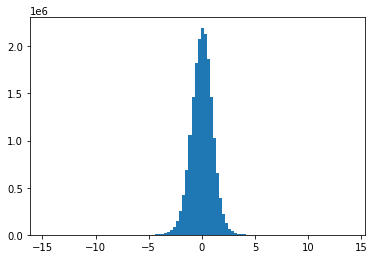

In [154]:
#Confirm normal distribution of z-score data
plt.hist(zscores.values.flatten(),bins=100)
plt.show()

In [158]:
#Find gene symbols for RefSeqIDs using mygene package
mg = mygene.MyGeneInfo()
geneList = mg.querymany(rpm_df.index,scopes='refseq',as_dataframe=True)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

/Users/brandonbergs/anaconda2/envs/v3_8/lib/python3.8/site-packages/biothings_client/base.py:147: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


5127 input query terms found no hit:
	['NM_000060', 'NM_001001709', 'NM_001001891', 'NM_001004698', 'NM_001007249', 'NM_001008737', 'NM_00
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [174]:
#Create a new zscore dataframe that includes gene symbols
zscores_symbols = zscores
zscores_symbols['symbol'] = geneList['symbol']
newCols = ['symbol']
newCols += zscores_symbols.columns[:-1].values.tolist()
zscores_symbols = zscores_symbols[newCols]

In [175]:
zscores_symbols

,symbol,SEQC_NB001,SEQC_NB002,SEQC_NB003,SEQC_NB004,SEQC_NB005,SEQC_NB006,SEQC_NB007,SEQC_NB008,SEQC_NB009,...,SEQC_NB489,SEQC_NB490,SEQC_NB491,SEQC_NB492,SEQC_NB493,SEQC_NB494,SEQC_NB495,SEQC_NB496,SEQC_NB497,SEQC_NB498
RefSeqID,,,,,,,,,,,,,,,,,,,,,
NM_000014,A2M,-0.609942,-0.639064,-0.366959,0.220934,-0.170388,-0.477985,1.07183,-0.540778,-0.580821,...,-0.500736,0.928043,-0.686387,0.15541,-0.521667,1.00449,0.799726,0.0789661,0.733293,1.5669
NM_000015,NAT2,-0.591986,NaN,-0.582482,0.621822,1.15745,-0.451167,0.0524989,NaN,0.873223,...,NaN,NaN,NaN,-0.274927,-1.48528,-0.477948,-0.522872,-1.04814,-1.11207,-0.546198
NM_000016,ACADM,0.660874,-0.0522034,-1.87785,1.28374,-1.56212,-0.138116,0.678057,0.611474,-1.53205,...,-3.09567,-1.30224,0.36877,-2.09264,1.30307,0.30004,0.871361,0.327962,0.169023,0.381657
NM_000017,ACADS,0.132708,-1.15337,-1.39598,-0.0420742,-1.60076,0.563141,-0.490768,-2.05598,-0.789463,...,-2.07946,-0.267726,-0.52729,-1.44424,-0.014683,-0.2599,-0.668159,-0.48816,-1.11946,0.00749081
NM_000018,ACADVL,-0.430734,0.117632,-1.20308,-1.26332,-1.0795,0.312264,-0.480164,-1.85649,-0.415287,...,-1.5908,-0.923491,-0.767477,-1.16601,0.326166,0.565593,0.363239,0.738599,0.876077,-0.158868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XR_133572,NaN,0.0278165,-0.762377,-0.786605,0.0669535,-1.87312,0.560825,0.81801,-1.47057,-0.68224,...,-0.0579121,-1.96817,1.07892,0.111681,0.454596,0.704327,0.696872,0.995059,1.18515,0.676372
XR_133573,NaN,1.07262,-0.422108,0.598442,-0.301125,-0.888478,1.00822,0.735035,-0.260147,-1.07386,...,0.50868,-1.59876,0.789673,0.358427,0.147683,0.658933,-0.38113,1.24629,1.73997,0.413065
XR_133574,NaN,-0.010509,0.00290528,-0.17723,0.229032,-0.503006,0.560558,1.05114,-0.980172,-0.347783,...,-0.338202,-2.55923,0.918911,-0.474261,0.411084,0.357426,0.692784,1.11246,1.58771,0.0738095


In [176]:
#Convert dataframe to csv
zscores_symbols.to_csv('../GSE62564/GSE62564_zscores.csv')

### Prepare microarray z-score csv

In [2]:
#Read in microarray log2 base data
array_df = pd.read_csv('../GSE49711/GSE49711_SEQC_NB_MAV_G_log2.20121127.txt',sep='\t')
array_df = array_df.set_index('#Gene')
array_df = array_df.drop(columns=['#NCBI GeneId','#RefSeq transcript Id','#Chromosome','#Strand','#from base','#to base','#Title','#Measured object'])




/Users/brandonbergs/anaconda2/envs/v3_8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


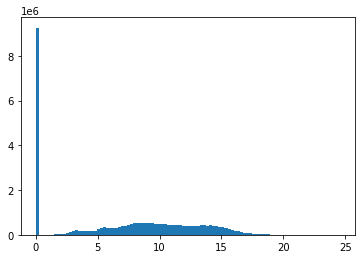

In [3]:
#Plot a histogram of all log2 base values
plt.hist(array_df.values.flatten(),bins=100)
plt.show()

/Users/brandonbergs/anaconda2/envs/v3_8/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/brandonbergs/anaconda2/envs/v3_8/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


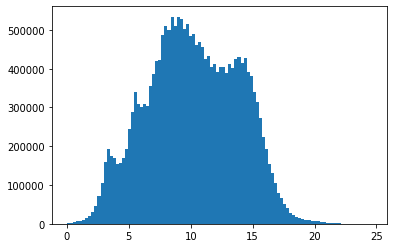

In [4]:
#There appears to be a non-normal spike for log2 values = 0
#This might be due to processing error
#Convert all log2 values = 0 to np.nanq
array_df[array_df == 0] = np.nan
plt.hist(array_df.values.flatten(),bins=100)
plt.show()

In [5]:
#Convert log2 dataframe into csv
array_df.to_csv('../GSE49711/GSE49711_log2.csv')

In [23]:
#Convert log2 dataframe into zscore dataframe
array_zscores = pd.DataFrame(index=array_df.index,columns=array_df.columns)
for row in array_df.index:
    array_zscores.loc[row] = zscore(array_df.loc[row].values,nan_policy='omit')

/Users/brandonbergs/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


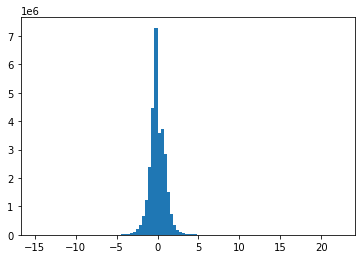

In [25]:
#Confirm normal distribution of z-score data
plt.hist(array_zscores.values.flatten(),bins=100)
plt.show()

In [26]:
#Convert z-score dataframe to csv
array_zscores.to_csv('../GSE49711/GSE49711_zscores.csv')